In [60]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [61]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [62]:
df = df.iloc[:,1:]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [63]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [64]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


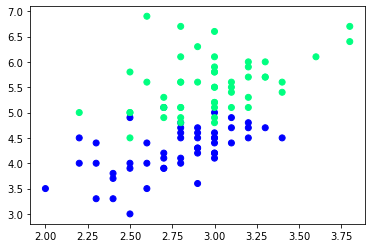

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [66]:
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
69,2.5,3.9,1
109,3.6,6.1,2
59,2.7,3.9,1
53,2.3,4.0,1
85,3.4,4.5,1
66,3.0,4.5,1
75,3.0,4.4,1
84,3.0,4.5,1
60,2.0,3.5,1
101,2.7,5.1,2


In [67]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [68]:
df_train

,SepalWidthCm,PetalLengthCm,Species
92,2.6,4.0,1
130,2.8,6.1,2
78,2.9,4.5,1
124,3.3,5.7,2
137,3.1,5.5,2
133,2.8,5.1,2
118,2.6,6.9,2
97,2.9,4.3,1
114,2.8,5.1,2
107,2.9,6.3,2


In [69]:
df_val

,SepalWidthCm,PetalLengthCm,Species
74,2.9,4.3,1
100,3.3,6.0,2
140,3.1,5.6,2
115,3.2,5.3,2
146,2.5,5.0,2


In [70]:
df_test

,SepalWidthCm,PetalLengthCm,Species
112,3.0,5.5,2
96,2.9,4.2,1
119,2.2,5.0,2
144,3.3,5.7,2
70,3.2,4.8,1


In [71]:
X_test = df_val.iloc[:,0:2].values
X_test

array([[2.9, 4.3],
       [3.3, 6. ],
       [3.1, 5.6],
       [3.2, 5.3],
       [2.5, 5. ]])

In [72]:
y_test = df_val.iloc[:,-1].values
y_test

array([1, 2, 2, 2, 2])

# Case 1 - Bagging

In [80]:
# Data for Tree 1
# From Train 

df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
130,2.8,6.1,2
130,2.8,6.1,2
124,3.3,5.7,2
130,2.8,6.1,2
137,3.1,5.5,2
124,3.3,5.7,2
118,2.6,6.9,2
133,2.8,5.1,2


In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [82]:
dt_bag1 = DecisionTreeClassifier()

In [83]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

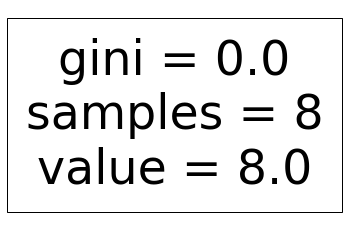

0.8


C:\Users\shuvomamun\anaconda3\Anaconda2109\Anaconda94\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\shuvomamun\anaconda3\Anaconda2109\Anaconda94\lib\site-packages\mlxtend\plotting\decision_regions.py:243: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,
C:\Users\shuvomamun\anaconda3\Anaconda2109\Anaconda94\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


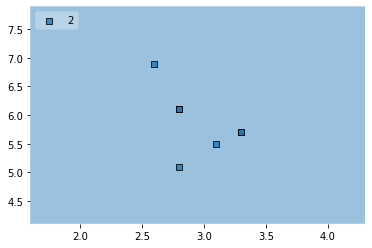

In [84]:
evaluate(dt_bag1,X,y)

In [85]:
# Againg same thing 

# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
137,3.1,5.5,2
107,2.9,6.3,2
137,3.1,5.5,2
78,2.9,4.5,1
137,3.1,5.5,2
97,2.9,4.3,1
107,2.9,6.3,2
124,3.3,5.7,2


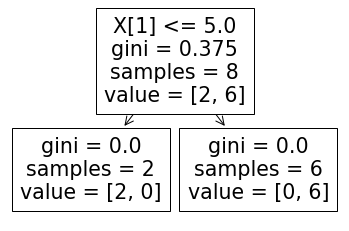

0.8


C:\Users\shuvomamun\anaconda3\Anaconda2109\Anaconda94\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\shuvomamun\anaconda3\Anaconda2109\Anaconda94\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


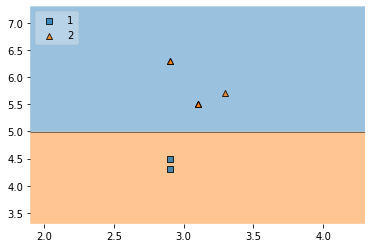

In [86]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [87]:
# Again

# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
137,3.1,5.5,2
114,2.8,5.1,2
107,2.9,6.3,2
97,2.9,4.3,1
114,2.8,5.1,2
107,2.9,6.3,2
130,2.8,6.1,2
114,2.8,5.1,2


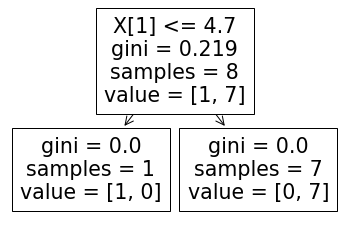

1.0


C:\Users\shuvomamun\anaconda3\Anaconda2109\Anaconda94\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\shuvomamun\anaconda3\Anaconda2109\Anaconda94\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


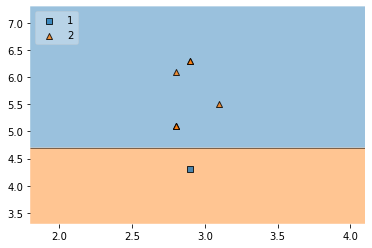

In [88]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

# Predict

In [89]:
df_test

,SepalWidthCm,PetalLengthCm,Species
112,3.0,5.5,2
96,2.9,4.2,1
119,2.2,5.0,2
144,3.3,5.7,2
70,3.2,4.8,1


In [90]:
print("Predictor 1",dt_bag1.predict(np.array([3.0,5.5]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([3.0,5.5]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([3.0,5.5]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


C:\Users\shuvomamun\anaconda3\Anaconda2109\Anaconda94\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\shuvomamun\anaconda3\Anaconda2109\Anaconda94\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\shuvomamun\anaconda3\Anaconda2109\Anaconda94\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pasting

In [92]:
# Difference between Bagging and Pasting -> Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
92,2.6,4.0,1
130,2.8,6.1,2
78,2.9,4.5,1
124,3.3,5.7,2
137,3.1,5.5,2
133,2.8,5.1,2
118,2.6,6.9,2
97,2.9,4.3,1
114,2.8,5.1,2
107,2.9,6.3,2


In [97]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
92,2.6,4.0,1
97,2.9,4.3,1
137,3.1,5.5,2
114,2.8,5.1,2
78,2.9,4.5,1
133,2.8,5.1,2
107,2.9,6.3,2
118,2.6,6.9,2


# Random Subspaces

In [99]:
# Column samplaing

df1 = pd.read_csv('Iris.csv')
df1 = df1.sample(10)
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
60,61,5.0,2.0,3.5,1.0,Iris-versicolor
89,90,5.5,2.5,4.0,1.3,Iris-versicolor
84,85,5.4,3.0,4.5,1.5,Iris-versicolor
25,26,5.0,3.0,1.6,0.2,Iris-setosa
149,150,5.9,3.0,5.1,1.8,Iris-virginica
9,10,4.9,3.1,1.5,0.1,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
34,35,4.9,3.1,1.5,0.1,Iris-setosa
64,65,5.6,2.9,3.6,1.3,Iris-versicolor


In [100]:
df1.sample(2,replace=True,axis=1)

,SepalLengthCm,Id
54,6.5,55
60,5.0,61
89,5.5,90
84,5.4,85
25,5.0,26
149,5.9,150
9,4.9,10
6,4.6,7
34,4.9,35
64,5.6,65


# Random Patches

In [101]:
# Row sampling + Column sampling

df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
60,61,5.0,2.0,3.5,1.0,Iris-versicolor
89,90,5.5,2.5,4.0,1.3,Iris-versicolor
84,85,5.4,3.0,4.5,1.5,Iris-versicolor
25,26,5.0,3.0,1.6,0.2,Iris-setosa
149,150,5.9,3.0,5.1,1.8,Iris-virginica
9,10,4.9,3.1,1.5,0.1,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
34,35,4.9,3.1,1.5,0.1,Iris-setosa
64,65,5.6,2.9,3.6,1.3,Iris-versicolor


In [102]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,Species,Id
25,Iris-setosa,26
34,Iris-setosa,35
54,Iris-versicolor,55
54,Iris-versicolor,55
149,Iris-virginica,150
9,Iris-setosa,10
89,Iris-versicolor,90
89,Iris-versicolor,90
